# Libraries

In [ ]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math


# Source datasets

In [ ]:
satelite_url = "https://raw.githubusercontent.com/KathrynKashitsyn/WiD-Datathon/refs/heads/main/debris_payload.csv"
data = pd.read_csv(satelite_url)
data.head()

,INTLDES,NORAD_CAT_ID,OBJECT_TYPE,SATNAME,COUNTRY,LAUNCH,DECAY,PERIOD,INCLINATION,APOGEE,PERIGEE,RCS_SIZE,FILE,LAUNCH_YEAR,LAUNCH_NUM,LAUNCH_PIECE,CURRENT,OBJECT_NAME,OBJECT_ID,OBJECT_NUMBER
0,1957-001A,1,ROCKET BODY,SL-1 R/B,CIS,1957-10-04,1957-12-01,96.19,65.10,938.0,214.0,LARGE,1,1957,1,A,Y,SL-1 R/B,1957-001A,1
1,1957-001B,2,PAYLOAD,SPUTNIK 1,CIS,1957-10-04,1958-01-03,96.10,65.00,1080.0,64.0,NaN,7179,1957,1,B,Y,SPUTNIK 1,1957-001B,2
2,1957-002A,3,PAYLOAD,SPUTNIK 2,CIS,1957-11-03,1958-04-14,103.74,65.33,1659.0,211.0,SMALL,9221,1957,2,A,Y,SPUTNIK 2,1957-002A,3
3,1958-001A,4,PAYLOAD,EXPLORER 1,US,1958-02-01,1970-03-31,88.48,33.15,215.0,183.0,NaN,1,1958,1,A,Y,EXPLORER 1,1958-001A,4
4,1958-002B,5,PAYLOAD,VANGUARD 1,US,1958-03-17,NaN,132.61,34.26,3823.0,649.0,SMALL,9235,1958,2,B,Y,VANGUARD 1,1958-002B,5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65265 entries, 0 to 65264
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   INTLDES        65265 non-null  object 
 1   NORAD_CAT_ID   65265 non-null  int64  
 2   OBJECT_TYPE    65265 non-null  object 
 3   SATNAME        65265 non-null  object 
 4   COUNTRY        65265 non-null  object 
 5   LAUNCH         65265 non-null  object 
 6   DECAY          33988 non-null  object 
 7   PERIOD         64273 non-null  float64
 8   INCLINATION    64273 non-null  float64
 9   APOGEE         64273 non-null  float64
 10  PERIGEE        64273 non-null  float64
 11  RCS_SIZE       54449 non-null  object 
 12  FILE           65265 non-null  int64  
 13  LAUNCH_YEAR    65265 non-null  int64  
 14  LAUNCH_NUM     65265 non-null  int64  
 15  LAUNCH_PIECE   65246 non-null  object 
 16  CURRENT        65265 non-null  object 
 17  OBJECT_NAME    65265 non-null  object 
 18  OBJECT

## Column Explanations
📌 **Identification & Metadata**
* INTLDES - International Designator in satellite datasets,a standardized international naming system for satellites and space objects.
* NORAD_CAT_ID - The NORAD Catalog ID is a 5-digit or 6-digit number that uniquely identifies each tracked space object, including active satellites,inactive satellites,rocket bodies (upper stages),space debris, mission-related objects. Sequential ID assigned by US Space Force.
* OBJECT_TYPE - Classification (e.g., Payload, Rocket Body, Debris).
* SATNAME - the common name or designation assigned to a satellite or space object, which can include: official mission names, popular names, project code names.
* COUNTRY → Nation or group responsible for the object.
* RCS_SIZE - Size category inferred from radar cross section.      
* FILE - Source file identifier for the data (higher = more recent).   
* OBJECT_NAME - Common name associated with the object.   
* OBJECT_ID = INTLDES   
* OBJECT_NUMBER  = NORAD_CAT_ID      

📌 **Launch Information**
* LAUNCH - Date the object was launched (`YYYY-MM-DD`)
* DECAY - Date the object reentered Earth’s atmosphere (`YYYY-MM-DD`) and burns up or crashes to Earth. It's the end of an object's orbital life.
* LAUNCH_YEAR - Calendar year of the launch.
* LAUNCH_NUM - Sequential identifier of the launch within that year.
* LAUNCH_PIECE - Piece code (three-letter identifier for objects from the same launch).

📌 **Orbital Motion**
* PERIOD → Orbital period in minutes (time it takes for a satellite to complete one full orbit around the Earth).
* INCLINATION → Tilt of the orbit relative to Earth’s equator, in degrees.
* CURRENT - Indicates if the object is currently in orbit.  

📌 **Orbital Geometry**
* APOGEE - Highest altitude above Earth.
* PERIGEE - Lowest altitude above Earth.        
      
  



📌 **Derived Orbit Properties**
* apogee → Maximum orbital altitude above Earth (km).
* perigee → Minimum orbital altitude above Earth (km).

📌 **Lifecycle**
* decay → Date the object reentered Earth’s atmosphere (`YYYY-MM-DD`).

📌 **Radar Characteristics**
* rcsvalue → Radar Cross Section value (m²). Indicates detectability by radar.
* rcs_size → Size category inferred from radar cross section.


# Clean Datset

In [ ]:

url2 = "https://raw.githubusercontent.com/KathrynKashitsyn/WiD-Datathon/refs/heads/main/satellite_data_clean%20(1).csv"
df_sat = pd.read_csv(url2)
df_sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29140 entries, 0 to 29139
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   argOfPerigee              29140 non-null  float64
 1   bStar                     29132 non-null  float64
 2   createdAt                 29140 non-null  object 
 3   eccentricity              29140 non-null  float64
 4   semiMajorAxis             29109 non-null  float64
 5   satNo                     29140 non-null  int64  
 6   revNo                     29109 non-null  float64
 7   raan                      29140 non-null  float64
 8   period_els                29109 non-null  float64
 9   meanMotionDot             29118 non-null  float64
 10  meanMotionDDot            29118 non-null  float64
 11  meanMotion                29140 non-null  float64
 12  meanAnomaly               29140 non-null  float64
 13  inclination_els           29140 non-null  float64
 14  idOnOr

In [ ]:
df_sat.head()

,argOfPerigee,bStar,createdAt,eccentricity,semiMajorAxis,satNo,revNo,raan,period_els,meanMotionDot,...,is_current_orbiting,is_starlink,is_oneweb,is_iridium,is_constellation,dwelling_alt_km,dwelling_alt_km_weighted,dwelling_shell_idx,dwelling_shell_100km,alt_bin
0,158.0519,0.071972,2025-01-01 16:05:13.461000+00:00,0.002807,6694.428,60773,2104.0,332.9594,90.851,0.123356,...,False,False,False,False,False,316.2910,322.555000,3.0,300– 399 km,"(0, 1000]"
1,274.5234,0.000266,2025-01-02 00:05:13.604000+00:00,0.000283,6570.814,56091,10246.0,70.4408,88.346,0.011464,...,False,False,False,False,False,192.6765,193.297333,1.0,100– 199 km,"(0, 1000]"
2,333.9987,0.015160,2025-01-01 15:05:11.434000+00:00,0.002177,6675.056,33989,84795.0,57.0027,90.457,0.041511,...,False,False,False,False,False,296.9185,301.763000,2.0,200– 299 km,"(0, 1000]"
3,212.6438,0.000296,2025-01-01 12:05:11.766000+00:00,0.000228,6524.163,53714,12937.0,346.7018,87.407,0.158177,...,False,True,False,False,True,146.0265,146.523000,1.0,100– 199 km,"(0, 1000]"
4,59.2819,0.018898,2025-01-01 23:05:11.521000+00:00,0.001498,7089.840,38275,74271.0,262.7376,99.018,0.000812,...,True,False,False,False,False,711.7035,715.243000,7.0,700– 799 km,"(0, 1000]"


In [ ]:
df_sat['name_only'] = df_sat['satname'].str.split(r'\d+').str[0].str.strip()

#  results
print(df_sat[['satname', 'name_only']].head())

           satname  name_only
0        CZ-6A DEB        CZ-
1      COSMOS 2568     COSMOS
2  COSMOS 2251 DEB     COSMOS
3    STARLINK-4688  STARLINK-
4   METEOR 2-5 DEB     METEOR


In [ ]:
print(df_sat['name_only'].value_counts())

name_only
STARLINK-    8531
COSMOS       2970
CZ-          2121
FENGYUN      1987
SL-          1766
             ... 
SORCE           1
OBJECT AT       1
ESEO            1
NANOSAT         1
KL-BETA B       1
Name: count, Length: 1672, dtype: int64


In [ ]:
df_sat['name_only'].value_counts().describe()

,count
count,1672.00000
mean,17.42823
std,239.00270
min,1.00000
25%,1.00000
50%,1.00000
75%,3.00000
max,8531.00000


# Viz: Object Counts

In [ ]:
df_sat['object_type'].value_counts()

,count
object_type,
Payload,15330
Debris,10938
Rocket body,2237
Unknown,635


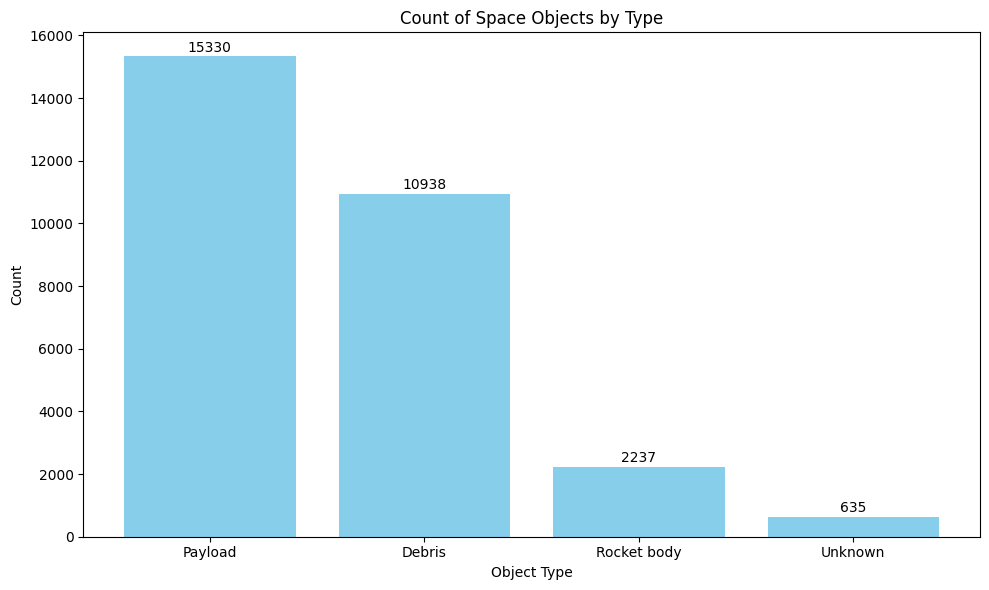

In [ ]:
# Get object type counts
object_type_counts = df_sat['object_type'].value_counts()

# Create the plot
plt.figure(figsize=(10, 6))
bars = plt.bar(object_type_counts.index, object_type_counts.values, color='skyblue')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 50,
             f'{int(height)}', ha='center', va='bottom')

plt.title('Count of Space Objects by Type')
plt.xlabel('Object Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Viz: classes of orbits

**Orbit Class Breakdown**


**LEO:** Low Earth Orbit (160–2,000 km altitude).Most common orbit for satellites.
Examples: ISS, Hubble, Starlink, Earth observation satellites.
Characteristics: Short orbital period (~90–120 minutes), fast movement



**HEO:** Highly Elliptical Orbit. Egg-shaped orbits with low perigee and high apogee.
Examples: Molniya orbits (Russian communications), some spy satellites.
Characteristics: Long dwell time over specific regions



**MEO:** Medium Earth Orbit (2,000–35,786 km altitude).
Examples: GPS, GLONASS, Galileo navigation satellites
Characteristics: ~12-hour orbital period, moderate coverage



**GEO:** 877 objects
Geostationary Orbit (35,786 km altitude exactly). Fixed position over equator, moves with Earth's rotation.
Examples: Weather satellites, TV broadcast, communications
Characteristics: 24-hour orbital period, always views same area



**Unknown:** Orbit class cannot be determined. Could be decayed objects awaiting removal from catalog. Tracking anomalies or recently added objects not yet classified.


In [ ]:
def classify_orbit(perigee_km, apogee_km, eccentricity):
    """Classify orbit based on perigee, apogee, and eccentricity."""
    if pd.isna(perigee_km) or pd.isna(apogee_km):
        return 'Unknown'
    # GEO band check (both near GEO altitude)
    if (abs(perigee_km - 35786) <= 200) and (abs(apogee_km - 35786) <= 200):
        return 'GEO'
    # HEO check
    if eccentricity > 0.1 and (apogee_km - perigee_km) > 10000:
        return 'HEO'
    # LEO / MEO otherwise
    if perigee_km < 2000:
        return 'LEO'
    if perigee_km < 35786:
        return 'MEO'
    return 'HEO'

df_sat['orbit_class'] = df_sat.apply(lambda row: classify_orbit(row['perigee_alt_km'], row['apogee_alt_km'], row['eccentricity']), axis=1)
df_sat['orbit_class'].value_counts()

,count
orbit_class,
LEO,24872
HEO,2473
MEO,887
GEO,877
Unknown,31


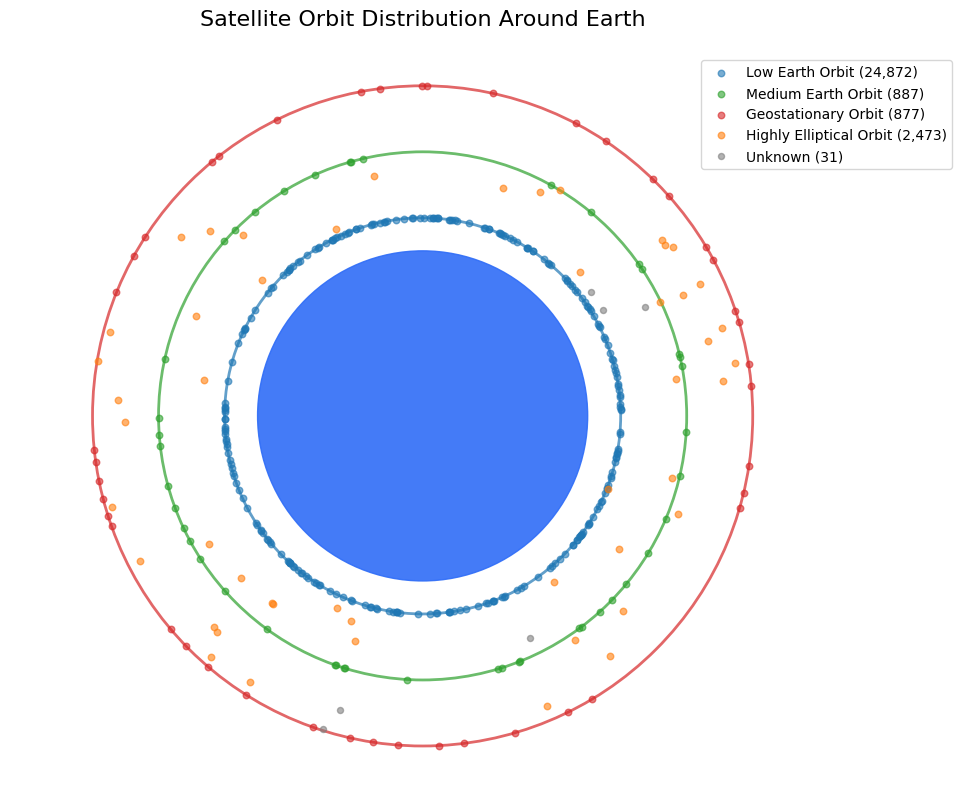

In [ ]:
from matplotlib.patches import Circle
import matplotlib.pyplot as plt
import numpy as np

orbit_classes = ['LEO', 'HEO', 'MEO', 'GEO', 'Unknown']
counts = [24872, 2473, 887, 877, 31]
percentages = [85.35, 8.49, 3.04, 3.01, 0.11]

# Colors for each orbit class
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#7f7f7f']

# Create figure and axis (single subplot) with wider figure
fig, ax = plt.subplots(figsize=(16, 8))

# Draw Earth
earth = Circle((0, 0), 1, color='#2F6DF7', alpha=0.9)
ax.add_patch(earth)

# Orbit radii (normalized)
leo_radius = 1.2
meo_radius = 1.6
geo_radius = 2.0

# Draw orbit rings
leo_ring = Circle((0, 0), leo_radius, fill=False, color=colors[0], linestyle='-', linewidth=2, alpha=0.7)
meo_ring = Circle((0, 0), meo_radius, fill=False, color=colors[2], linestyle='-', linewidth=2, alpha=0.7)
geo_ring = Circle((0, 0), geo_radius, fill=False, color=colors[3], linestyle='-', linewidth=2, alpha=0.7)

ax.add_patch(leo_ring)
ax.add_patch(meo_ring)
ax.add_patch(geo_ring)

# Add scatter points to represent satellites
np.random.seed(42)  # For reproducible random points

# Create legend labels with counts
leo_label = f'Low Earth Orbit ({counts[0]:,})'
meo_label = f'Medium Earth Orbit ({counts[2]:,})'
geo_label = f'Geostationary Orbit ({counts[3]:,})'
heo_label = f'Highly Elliptical Orbit ({counts[1]:,})'
unknown_label = f'Unknown ({counts[4]:,})'

# LEO points
leo_theta = np.random.uniform(0, 2*np.pi, int(counts[0]/100))  # Scaling down for visualization
leo_x = leo_radius * np.cos(leo_theta)
leo_y = leo_radius * np.sin(leo_theta)
ax.scatter(leo_x, leo_y, color=colors[0], s=22, alpha=0.6, label=leo_label)

# MEO points
meo_theta = np.random.uniform(0, 2*np.pi, int(counts[2]/20))  # Scaling down
meo_x = meo_radius * np.cos(meo_theta)
meo_y = meo_radius * np.sin(meo_theta)
ax.scatter(meo_x, meo_y, color=colors[2], s=22, alpha=0.6, label=meo_label)

# GEO points
geo_theta = np.random.uniform(0, 2*np.pi, int(counts[3]/20))  # Scaling down
geo_x = geo_radius * np.cos(geo_theta)
geo_y = geo_radius * np.sin(geo_theta)
ax.scatter(geo_x, geo_y, color=colors[3], s=22, alpha=0.6, label=geo_label)

# HEO points (elliptical orbits)
heo_theta = np.random.uniform(0, 2*np.pi, int(counts[1]/50))  # Scaling down
heo_r = leo_radius + (geo_radius - leo_radius) * np.random.random(len(heo_theta))
heo_x = heo_r * np.cos(heo_theta)
heo_y = heo_r * np.sin(heo_theta)
ax.scatter(heo_x, heo_y, color=colors[1], s=22, alpha=0.6, label=heo_label)

# Unknown points
unknown_theta = np.random.uniform(0, 2*np.pi, int(counts[4]/5))  # Scaling down
unknown_r = leo_radius + (geo_radius - leo_radius) * np.random.random(len(unknown_theta))
unknown_x = unknown_r * np.cos(unknown_theta)
unknown_y = unknown_r * np.sin(unknown_theta)
ax.scatter(unknown_x, unknown_y, color=colors[4], s=19, alpha=0.6, label=unknown_label)

# Set aspect ratio and limits
ax.set_aspect('equal')
ax.set_xlim(-2.5, 2.5)  # Increased x-limits to create more space
ax.set_ylim(-2.2, 2.2)
ax.set_title('Satellite Orbit Distribution Around Earth', fontsize=16, pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1.0))  # Moved legend outside the plot
ax.axis('off')

plt.tight_layout()
plt.show()

# Assign inclination bands

**Why we calculate it**
- Inclination tells you a satellite’s tilt relative to Earth’s equator.
- Binning it makes orbital planes easy to compare and helps explain traffic corridors (equatorial vs polar vs retrograde planes).
- Conjunction risk is very plane-dependent: crowded planes (e.g., sun-sync near ~98°) see more potential close approaches.

**What it’s useful for**
- Identify which planes are congested.
- Compare operators/constellations by plane.
- Drive heatmaps (altitude shell × inclination band) to show “where the highways are.”

**How to interpret the categories**
- Equatorial (0–30°): GEO and near-equatorial LEO/MEO users; low lat coverage, great for fixed ground links.
- Mid (30–60°): Mixed users; broad coverage without going polar.
- Polar/Sun-sync (60–90°): Earth-observation heavy.
- Retrograde (>90°): Orbits going opposite Earth rotation; rarer, fuel-expensive; can cross other traffic → interesting for risk.

In [ ]:
def inclination_band(deg):
    if pd.isna(deg): return "Unknown"
    if deg < 30:     return "Equatorial (0–30°)"
    if deg < 60:     return "Mid (30–60°)"
    if deg <= 90:   return "Polar/Sun-sync (60–90°)"
    return "Retrograde (>90°)"

df_sat["inclination_band"] = df_sat["inclination_els"].apply(inclination_band)
df_sat["inclination_band"].value_counts()

,count
inclination_band,
Mid (30–60°),9116
Retrograde (>90°),8609
Polar/Sun-sync (60–90°),8131
Equatorial (0–30°),3284


# Assign Elliptical Class

**Why we calculate it**
- Eccentricity describes how stretched the orbit is.
- Highly elliptical orbits sweep through multiple altitude shells, touching regions that circular LEOs never visit → different risk profile and drag behavior.

**What it’s useful for**
- Separate circular constellations (Starlink/OneWeb, GEO) from transfer/HEO users (GTO, Molniya, Tundra).
- Explain why some bands have transient traffic (HEO perigees pass through then depart).
- Decide which objects belong in a perigee-based shell analysis.

**How to interpret the categories**
- Near-Circular (<0.01): Constellations and GEO; stable altitude → persistent congestion within a shell.
- Elliptical (0.01–0.10): Transfers or specialized missions; moderate shell crossing.
- Highly Elliptical (≥0.10): Big apogee/perigee swings; spend long time near apogee, dip through perigee shells quickly → they touch many shells but don’t dwell there.

In [ ]:
def ecc_class(e):
    if pd.isna(e): return "Unknown"
    if e < 0.01:   return "Near-Circular (<0.01)"
    if e < 0.10:   return "Elliptical (0.01–0.10)"
    return "Highly Elliptical (≥0.10)"

df_sat["ecc_class"] = df_sat["eccentricity"].apply(ecc_class)
df_sat["ecc_class"].value_counts()

,count
ecc_class,
Near-Circular (<0.01),22616
Elliptical (0.01–0.10),4266
Highly Elliptical (≥0.10),2258


# Viz: Distribution by Altitude and Inclination

LEO (<2,000 km perigee)

MEO (2,000–35,000 km)

GEO (near 35,786 km ± 200 km)

HEO (eccentric >0.1, apogee > GEO)

/tmp/ipython-input-1066832879.py:31: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



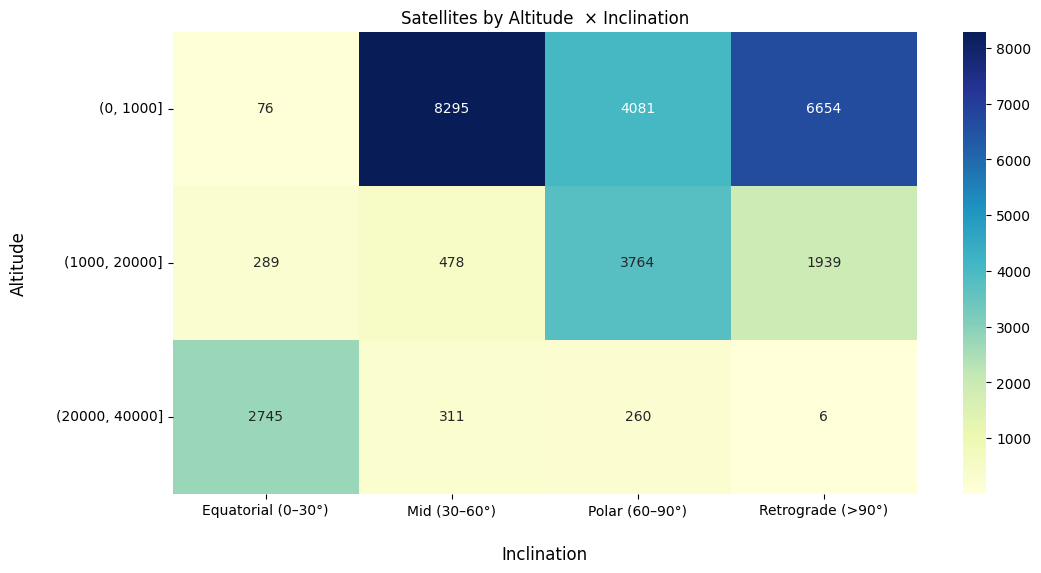

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Step 1: Define helper functions ---
def inclination_band(deg):
    if pd.isna(deg): return "Unknown"
    if deg < 30:     return "Equatorial (0–30°)"
    if deg < 60:     return "Mid (30–60°)"
    if deg <= 90:    return "Polar (60–90°)"
    return "Retrograde (>90°)"

def ecc_class(e):
    if pd.isna(e): return "Unknown"
    if e < 0.01:   return "Near-Circular (<0.01)"
    if e < 0.10:   return "Elliptical (0.01–0.10)"
    return "Highly Elliptical (≥0.10)"

# --- Step 2: Assign bands and classes ---
df_sat["inclination_band"] = df_sat["inclination_els"].apply(inclination_band)
df_sat["ecc_class"] = df_sat["eccentricity"].apply(ecc_class)

# --- Step 3: Define altitude bins (same as your heatmap) ---
alt_bins = [0, 1000, 20000, 40000]
alt_labels = ["(0, 1000]", "(1000, 20000]", "(20000, 40000]"]
df_sat["alt_bin"] = pd.cut(df_sat["apogee_alt_km"], bins=alt_bins, labels=alt_labels)

# --- Step 4: Build pivot table ---
pivot = (
    df_sat
    .groupby(["alt_bin", "inclination_band"])
    .size()
    .reset_index(name="count")
    .pivot(index="alt_bin", columns="inclination_band", values="count")
    .fillna(0)
)

# --- Step 5: Plot heatmap ---
plt.figure(figsize=(12,6))
sns.heatmap(
    pivot,
    annot=True,
    fmt=".0f",
    cmap="YlGnBu"
)
plt.title("Satellites by Altitude  × Inclination")
plt.ylabel("Altitude", fontsize=12, labelpad=20)
plt.xlabel("Inclination", fontsize=12, labelpad=20)

plt.xticks(rotation=0)
plt.yticks(rotation=0)

plt.show()


# Viz: Launch by years and decades

In [ ]:
df_sat['launch_year'].value_counts().sort_index()

,count
launch_year,
1958,3
1959,5
1960,11
1961,210
1962,25
...,...
2021,1408
2022,2728
2023,2701


In [ ]:
lauch_year_dict = {'1950s': range(1950, 1960),
                   '1960s': range(1960, 1970),
                   '1970s': range(1970, 1980),
                   '1980s': range(1980, 1990),
                   '1990s': range(1990, 2000),
                   '2000s': range(2000, 2010),
                   '2010s': range(2010, 2020),
                   '2020s': range(2020, 2030)}

def classify_launch_year(year):
    if pd.isna(year): return "Unknown"
    for decade, years in lauch_year_dict.items():
        if year in years:
            return decade
    return "Unknown"

df_sat['launch_decade'] = df_sat['launch_year'].apply(classify_launch_year)
df_sat['launch_decade'].value_counts().sort_index()

,count
launch_decade,
1950s,8
1960s,1314
1970s,2655
1980s,2397
1990s,5120
2000s,1780
2010s,2500
2020s,13366


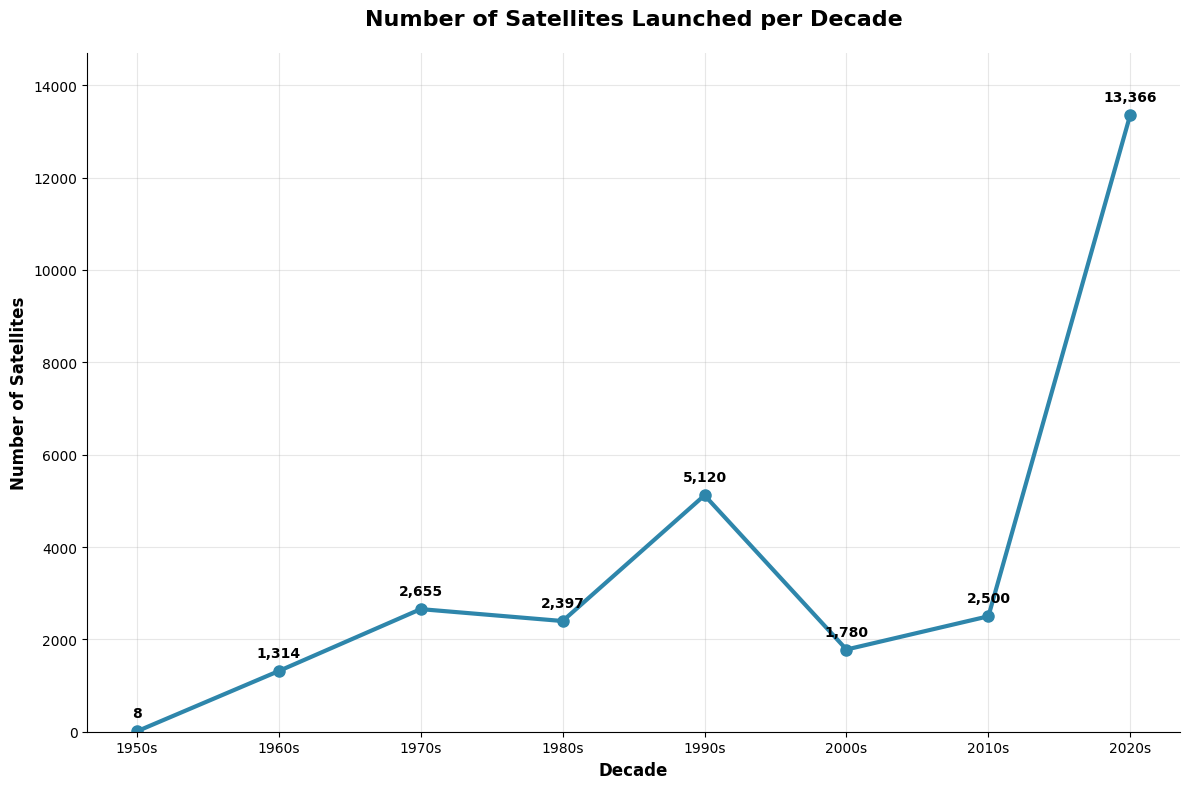

In [ ]:
# Create the visualization
plt.figure(figsize=(12, 8))

decades = ['1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s', '2020s']
satellite_counts = [8,  # 1958-1959
                   df_sat['launch_decade'].value_counts().sort_index().get('1960s', 0),
                   df_sat['launch_decade'].value_counts().sort_index().get('1970s', 0),
                   df_sat['launch_decade'].value_counts().sort_index().get('1980s', 0),
                   df_sat['launch_decade'].value_counts().sort_index().get('1990s', 0),
                   df_sat['launch_decade'].value_counts().sort_index().get('2000s', 0),
                   df_sat['launch_decade'].value_counts().sort_index().get('2010s', 0),
                   df_sat['launch_decade'].value_counts().sort_index().get('2020s', 0)]

# Create line plot
line = plt.plot(decades, satellite_counts, marker='o', linewidth=3, markersize=8, color='#2E86AB')

# Add value annotations on each point
for i, count in enumerate(satellite_counts):
    plt.annotate(f'{count:,}',
                 (decades[i], satellite_counts[i]),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center',
                 fontweight='bold')

# Customize the plot
plt.title('Number of Satellites Launched per Decade', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Decade', fontsize=12, fontweight='bold')
plt.ylabel('Number of Satellites', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=0)

# Set y-axis to start from 0
plt.ylim(0, max(satellite_counts) * 1.1)

# Add some styling
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


# Viz: Launch by countries

In [ ]:
df_sat['country'].value_counts()

,count
country,
US,14337
CIS,5800
PRC,5379
UK,720
FR,557
...,...
FRIT,1
BELA,1
TMMC,1


In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Get top countries
top_countries = df_sat['country'].value_counts()
top_5 = top_countries.head(5)
others_count = top_countries[5:].sum()

# Create data for the treemap
labels = list(top_5.index) + ['Others']
parents = ['World'] * 6
values = list(top_5.values) + [others_count]

# Calculate percentages
total = sum(values)
percentages = [(v / total) * 100 for v in values]

# Custom labels
custom_labels = [
    f"{country}<br>{percentage:.1f}%"
    for country, percentage in zip(labels, percentages)
]

# Define custom colors (blue, orange, light blue, etc.)
custom_colors =  ["#272D2D", "#094661", "#569AB8", "#9ED0E6", "#9EB0B8"]

# Create treemap with YlGnBu color scheme
fig = px.treemap(
    names=custom_labels,
    parents=parents,
    values=values,
    title='Proportion of Space Objects by Country',
    color=values,  # needed to map values to the colorscale
    color_continuous_scale = custom_colors
)




# Update trace for better formatting
fig.update_traces(
    textinfo='label',
    textfont_size=14,
    marker=dict(cornerradius=5),
    hovertemplate='<b>%{label}</b><br>Count: %{value}<br>Percentage: %{percentParent:.1%}',
)

fig.update_layout(
    coloraxis_showscale=False,  # hides the color scale
    width=1000,
    height=700,
    margin=dict(t=50, l=25, r=25, b=25),
    treemapcolorway=custom_colors
)

fig.show()


## Ownership Classification

In [ ]:
name_counts = df_sat[df_sat['country'] == 'US']['name_only'].value_counts()
multiple_names = name_counts[name_counts > 1]

print("Names that appear more than once in the US:")
for name, count in multiple_names.items():
    print(f"{name}: {count} occurrences")

Names that appear more than once in the US:
STARLINK-: 8531 occurrences
DELTA: 1065 occurrences
NOAA: 503 occurrences
OPS: 333 occurrences
THORAD AGENA D DEB: 311 occurrences
ATLAS: 267 occurrences
DMSP: 245 occurrences
IRIDIUM: 240 occurrences
TITAN: 217 occurrences
THOR ABLESTAR DEB: 201 occurrences
FLOCK: 151 occurrences
THORAD DELTA: 150 occurrences
USA: 103 occurrences
KUIPER-: 78 occurrences
NIMBUS: 74 occurrences
LEMUR: 73 occurrences
NAVSTAR: 71 occurrences
FALCON: 58 occurrences
PEGASUS DEB: 58 occurrences
SCOUT G-: 45 occurrences
ELECTRON KICK STAGE R/B: 39 occurrences
IUS R/B(: 36 occurrences
WESTFORD NEEDLES: 36 occurrences
HAWK-: 33 occurrences
GALAXY: 30 occurrences
GOES: 26 occurrences
ATLAS CENTAUR R/B: 25 occurrences
OV: 24 occurrences
SATCOM: 23 occurrences
THOR BURNER: 22 occurrences
SCOUT X-: 21 occurrences
CRRES DEB (CANISTER): 21 occurrences
SCOUT A DEB: 21 occurrences
PEGASUS R/B: 20 occurrences
MIDAS: 20 occurrences
ECHOSTAR: 19 occurrences
EXPLORER: 16 occurren

The classification is based on the primary operator or the mission's founding purpose. Many names represent entire families or programs, so they are classified as a whole.



📌**Governmental**

*These are satellites owned and operated by national governments, military organizations, or public space agencies (like NASA, NOAA, USSF).*

NOAA (National Oceanic and Atmospheric Administration)

OPS (Old designation for US military satellites)

DMSP (Defense Meteorological Satellite Program - US Military)

USA (United States Satellite - likely US military classification)

NIMBUS (NASA Earth science program)

NAVSTAR (Official name for the GPS constellation - US Military)

GOES (Geostationary Operational Environmental Satellite - NASA/NOAA)

MIDAS (Missile Defense Alarm System - US Military early warning)

EXPLORER (NASA science program)

TRANSIT (US Navy navigation system, precursor to GPS)

TDRS (Tracking and Data Relay Satellite - NASA)

TIROS (Television Infrared Observation Satellite - NASA/NOAA)

LES (Lincoln Experimental Satellite - US Military/MIT)

LANDSAT (NASA/USGS Earth observation)

SECOR (US Army geodesic satellite)

VELA (US Military nuclear detonation detection)

ATS (Applications Technology Satellite - NASA)

MMS (Magnetospheric Multiscale Mission - NASA)

SMS (Synchronous Meteorological Satellite - NASA/NOAA)

VANGUARD (US Navy early satellite program)

NTS (Navigation Technology Satellite - US Military, precursor to GPS)

OAO (Orbiting Astronomical Observatory - NASA)

FLTSATCOM (US Navy Fleet Satellite Communications)

NNSS (Navy Navigation Satellite System, another name for TRANSIT)

LAGEOS (NASA/ASI geodetic satellite)

DSCS (Defense Satellite Communications System - US Military)

HUBBLE (Hubble Space Telescope - NASA/ESA)

GRACE-FO (Gravity Recovery and Climate Experiment Follow-On - NASA/GFZ)

SBIRS GEO (Space Based Infrared System Geosynchronous - US Missile Warning)

AEHF (Advanced Extremely High Frequency - US Military communications)

WGS (Wideband Global SATCOM - US Military communications)

MUOS (Mobile User Objective System - US Navy communications)

TACSAT (Tactical Satellite - US Military)

TIMATION (US Navy timing/navigation satellite, GPS precursor)

SURCAL (US Navy calibration satellites)



📌**Private**
*These are satellites owned and operated by commercial companies.*

STARLINK- (SpaceX broadband constellation)

IRIDIUM (Iridium Communications satellite phone constellation)

FLOCK (Planet Labs Earth imaging cubesat constellation)

KUIPER- (Amazon's Project Kuiper broadband constellation)

LEMUR (Spire Global weather & ADS-B tracking constellation)

GALAXY (Intelsat communications satellites)

SATCOM (General term, but often refers to private comsats like RCA Satcom)

ECHOSTAR (EchoStar Corporation communications)

DIRECTV (DirectTV broadcasting)

GLOBAL- (Globalstar satellite phone constellation)

SKYSAT C (Planet Labs high-resolution imaging)

TELSTAR (Originally AT&T, now owned by Telesat)

APRIZESAT (SpaceQuest/AprizeSat asset tracking)

LEASAT (Leasat/Syncom IV, commercial comsats leased by the US Military)

INTELSAT (International Telecommunications Satellite Organization, now private)

CAPELLA- (Capella Space SAR imaging)

XM- (Sirius XM radio broadcasting)

YAM- (Astro Digital Earth observation)

PICOSAT (Generic term, but often private tech demonstrators)

WORLDVIEW (Maxar Earth imaging)

SPACENET (Private communications satellites)

ECHO (Balloon satellite, but also a communications company)

GSTAR (General Signals Technology Satellite, private comsat)

SIRIUS (Sirius XM radio broadcasting)

COMSTAR (Commercial Communications Satellite, owned by AT&T/Comsat)

VIASAT (Viasat communications)

ORBVIEW (Orbital Sciences/GeoEye Earth observation)

SIRIUS FM- (Sirius XM radio broadcasting)

SIRIUS XM- (Sirius XM radio broadcasting)

MORELOS (Mexican communications satellites, but often built/launched by private consortia)

WESTAR (Western Union communications satellites)

ANIK C (Telesat Canada communications satellites)

GLOBALSTAR M (Globalstar satellite phone constellation)

PAS (PanAmSat communications satellites)



📌**Undefined / Mixed / Debris**
*This category includes rocket bodies, debris, generic names, very small satellites (CubeSats) from mixed operators, and names that are too ambiguous to classify without more context.*


DELTA (Could be a satellite, but most often refers to Delta rocket bodies (R/B) or debris)

THORAD AGENA D DEB (Explicitly debris from a Thor-Agena rocket)

ATLAS (Could be a satellite, but most often refers to Atlas rocket bodies (R/B) or debris)

TITAN (Refers to Titan rocket bodies (R/B) or debris)

THOR ABLESTAR DEB (Explicitly debris from a Thor-Ablestar rocket)

THORAD DELTA (Rocket body/debris)

FALCON (Likely refers to Falcon rocket bodies (R/B) from SpaceX)

PEGASUS DEB (Debris from a Pegasus rocket)

SCOUT G- (Scout rocket body/debris)

ELECTRON KICK STAGE R/B (Rocket body from Rocket Lab's Electron)

IUS R/B( (Inertial Upper Stage Rocket Body)

WESTFORD NEEDLES (Experimental US Military project, but now just space debris)

ATLAS CENTAUR R/B (Rocket Body)

OV (Orbiting Vehicle - a series of US military research satellites, mostly scientific)

THOR BURNER (Rocket stage)

SCOUT X- (Scout rocket body/debris)

CRRES DEB (CANISTER) (Debris from the CRRES mission)

SCOUT A DEB (Debris from a Scout rocket)

PEGASUS R/B (Pegasus Rocket Body)

ICEYE-X (Iceye SAR satellites, but the 'X' suggests an experimental prototype - could be argued as Private)

AEROCUBE (The Aerospace Corporation's cubesats - a federally funded R&D center, so could be argued as Governmental)

ELECTRON R/B (Rocket Body)

SCOUT B DEB (Debris)

UFO (UHF Follow-On communications satellites for the US Navy - should be Governmental)

THOR ABLESTAR R/B (Rocket Body)

SCOUT A R/B (Rocket Body)

IUS DEB (Debris from an IUS stage)

IABS R/B (Rocket Body)

ATLAS CENTAUR (Rocket stage)

SOLRAD (US Naval Research Laboratory satellites - should be Governmental)

CYGFM (Generic CYGNSS FM = mission, but the name is often used for debris from that NASA mission)

TOMORROW-S (Tomorrows Company satellites - Private)

PICOSAT (Generic term for small sats from various operators)

GGSE (Gravity Gradient Stabilization Experiment - US Military/NRL - should be Governmental)

SCOUT B- (Scout rocket body/debris)

THOR AGENA B DEB (Debris)

FALCON HEAVY R/B (Rocket Body)

THOR AGENA D R/B (Rocket Body)

SPACEMOBILE-SSR (AST SpaceMobile - Private)

MINOTAUR (Rocket, could be body/debris)

ATLAS AGENA R/B (Rocket Body)

SSU (Sensor Satellite Underflight? Ambiguous)

GHOST- (General term, or a specific mission? Ambiguous)

WESTAR (Private, but listed again here)

SPACEMOBILE- (AST SpaceMobile - Private)

UMBRA- (Umbra Lab SAR imaging - Private)

LYNK TOWER (Lynk Global comsat - Private)

BB (Unknown/Ambiguous)

ATLAS H R/B (Rocket Body)

THOR AGENA B R/B (Rocket Body)

THOR DELTA (Rocket body/debris)

ATLAS AGENA B DEB (Debris)

SNAP- (Could be SNAP-1 nanosatellite or SNAP nuclear systems - ambiguous)

LDPE- (DoD Space Test Program payloads on commercial satellites - Governmental)

RAPTOR (Astro Digital Earth observation - Private)

BLACKJACK ACES- (DARPA program - Governmental)

SATCOM K (US Military communications - Governmental)

STARLING (NASA cubesat mission - Governmental)

**THOR ABLESTAR DEB *** (Debris)

THORAD AGENA D R/B (Rocket Body)

**THORAD AGENA D DEB *** (Debris)

WGS F (US Military - Governmental)

GNOMES- (PlanetiQ weather data - Private)

SMDC ONE (US Army Space and Missile Defense Command - Governmental)

SATCOM C (US Military - Governmental)

SMS (See above - Governmental)

TROPICS- (NASA science mission - Governmental)



...and most other entries with DEB, R/B, or single letters like S, R, P, PE, CP, GB, SS, ST, JD, CS, AO-. These are almost certainly debris, rocket bodies, or generic catalog identifiers. Names like HAWK-, OSCAR (amateur radio), CELESTIS (space burial), and PROMETHEUS (likely a mission name) are also ambiguous without more context.

# Viz: governmental vs private

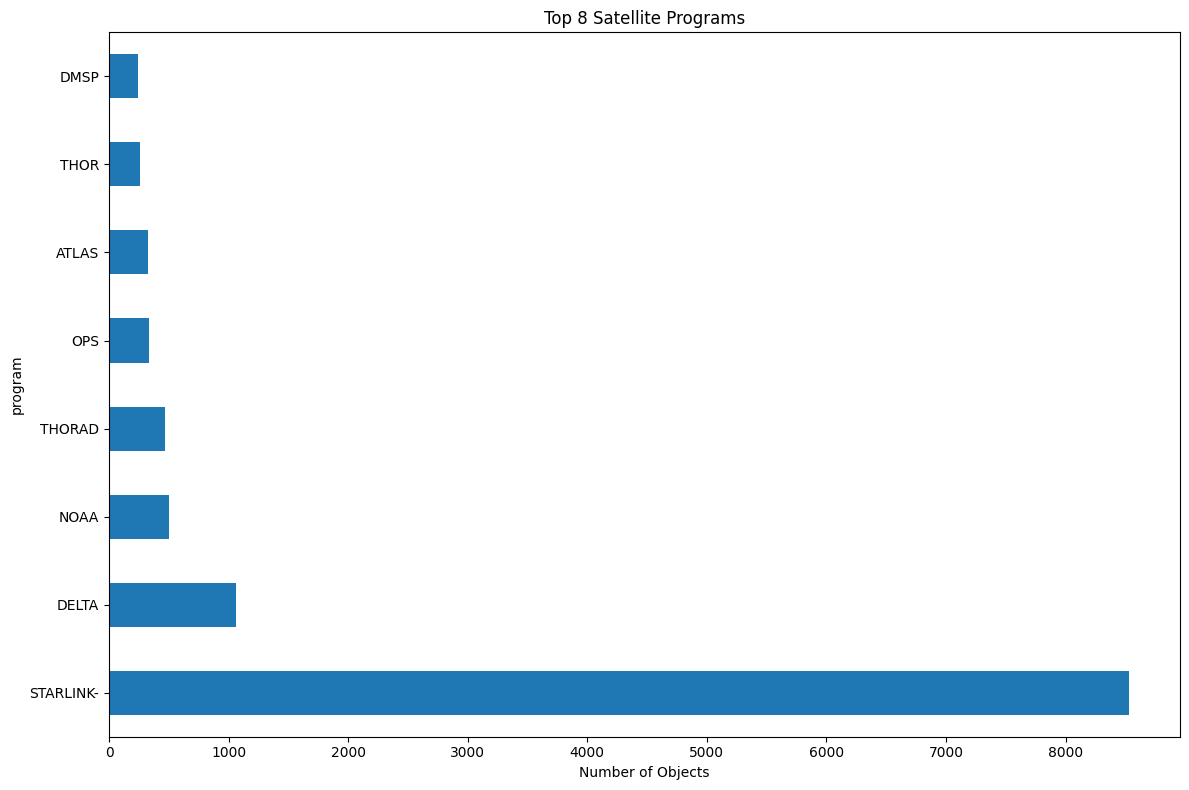

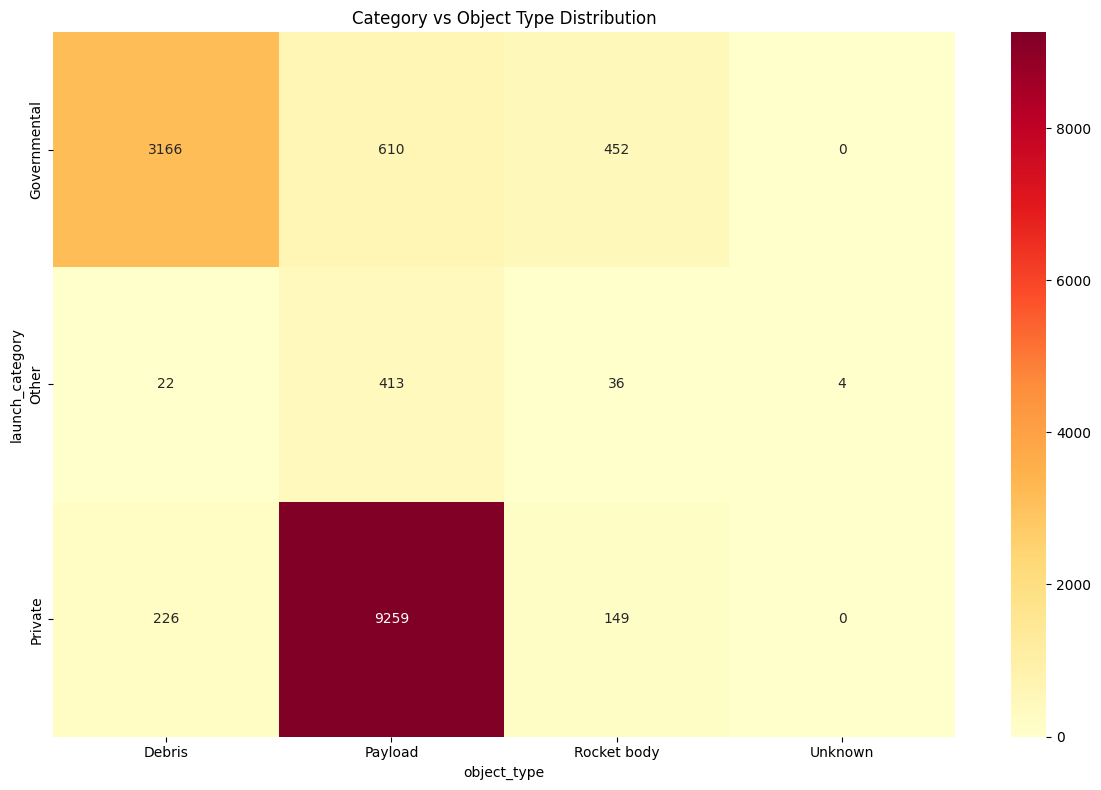

<Figure size 1400x1000 with 0 Axes>

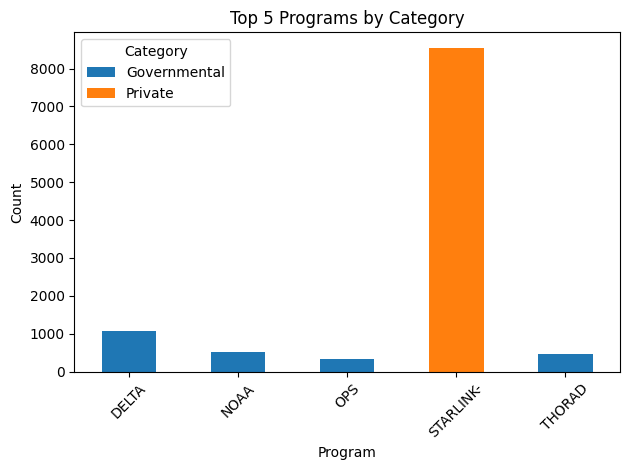

✅ Analysis complete!
📊 Total objects analyzed: 14,337
📁 Detailed results saved to: us_space_objects_detailed_analysis.csv
🖼️  Visualizations saved as separate PNG files


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter US objects
us_objects = df_sat[df_sat['country'] == 'US'].copy()

# --- REFINED CATEGORIZATION ---
# Let's improve the keyword lists based on common US space objects

governmental_keywords = [
    'NOAA', 'DMSP', 'GPS', 'GOES', 'LANDSAT', 'EOS', 'TDRS',
    'MODIS', 'ICESAT', 'JASON', 'GRACE', 'SUOMI', 'AQUA', 'TERRA',
    'CYGNSS', 'DSCS', 'WGS', 'SBIRS', 'NROL', 'MILSTAR',
    'DEFENSE', 'TITAN', 'MERURY', 'MISTY', 'PAN', 'TRUMPET',
    'VANGUARD', 'EXPLORER', 'BLAZAR', 'TEMPLAR', 'LACROSSE', 'INTRUDER',
    'DSP', 'NAVSTAR', 'WEATHER', 'EARTH', 'CLOUDSAT', 'CALIPSO',
    'SORCE', 'AURA', 'QUIKSCAT', 'SEAWIFS', 'TERRIERS',
    'OPS', 'USA', 'NIMBUS', 'TRANSIT', 'TIROS', 'MIDAS', 'SECOR',
    'LES', 'VELA', 'ATS', 'MMS', 'SMS', 'NTS', 'FLTSATCOM',
    'NNSS', 'LAGEOS', 'TACSAT', 'TIMATION', 'SURCAL', 'AEHF',
    'MUOS', 'LACE', 'HBTSS', 'GRACE-FO', 'HUBBLE', 'OAO',
    'POPACS', 'PUNCH-WFI', 'SYNCOM', 'PAGEOS', 'CALSPHERE',
    'DODECAPOLE', 'PORCUPINE', 'RELAY', 'TEMPSAT', 'COBE',
    'LINCS', 'CRRES', 'GGSE', 'SMDC', 'SSU', 'WILDFIRE', 'DELTA', 'ATLAS', 'TITAN', 'THORAD', 'THOR', 'SCOUT', 'IUS',
    'CENTAUR', 'MINOTAUR', 'SLS', 'ESSA', 'SOLRAD', 'UFO', 'ERS',
    'LDPE', 'WESTFORD', 'JASON', 'MARISAT', 'CYGFM'
]

private_keywords = [
    'STARLINK', 'SPACEX', 'PLANET', 'SKYSAT', 'FLOCK', 'DOVE',
    'LEMUR', 'GLOBALSTAR', 'ORBCOMM', 'KEPLER', 'SWARM',
    'ASTROCAST', 'CAPELLA', 'ICEYE', 'UMBRA', 'BLACKSKY',
    'GHOST', 'HYPERION', 'LIGHTSAIL', 'SKYFI', 'SPIRE', 'TELEOS',
    'IRIDIUM', 'GLOBALSTAR', 'ORBCOMM', 'ECHOSTAR', 'DIRECTV',
    'SIRIUS', 'XM', 'RADIOSAT', 'ASIASTAR', 'GALAXY', 'INTELSAT',
    'EUTELSAT', 'AMC', 'SATMEX', 'THURAYA', 'INMARSAT',
    'KUIPER', 'LEMUR', 'GALAXY', 'SATCOM', 'ECHOSTAR', 'DIRECTV',
    'GLOBAL', 'SKYSAT', 'TELSTAR', 'APRIZESAT', 'LEASAT',
    'INTELSAT', 'CAPELLA', 'XM', 'YAM', 'TOMORROW', 'WORLDVIEW',
    'SPACENET', 'GSTAR', 'SIRIUS', 'COMSTAR', 'VIASAT', 'ORBVIEW',
    'MORELOS', 'WESTAR', 'ANIK', 'GLOBALSTAR', 'PAS', 'HAWK',
    'LYNK', 'GNOMES', 'SPACEMOBILE', 'ECHO', 'RAPTOR', 'BB',
    'CELESTIS', 'SPACEWAY', 'FAISAT', 'PROPCUBE', 'DEMO',
    'MANDRAKE', 'OPTUS', 'JACKAL', 'GENESIS', 'PROMETHEUS',
    'MUSAT', 'PELICAN', 'TRACERS', 'IMPULSE', 'VIGORIDE',
    'STPSAT', 'OMNI', 'TYVAK', 'MACSAT', 'CS', 'AO', 'FALCON','FALCONSAT',
    'SEDNA', 'LIZZIESAT', 'DOVE', 'PEARL', 'SPACEBEE', 'PEGASUS', 'ELECTRON', 'FALCON', 'DRAGON', 'AEROCUBE', 'PICOSAT',
    'CUBESAT', 'BLACKJACK', 'LEGION'
]

# Enhanced categorization function
def categorize_launch(name, object_type):
    if pd.isna(name):
        return 'Other'

    name_str = str(name).upper()

    # Split the name into individual words and filter out debris-related terms
    words = name_str.split()
    filtered_words = [word for word in words if word not in ['R/B', 'DEB', 'ROCKET', 'DEBRIS', 'R/B(', 'DEB(', 'STAGE']]

    # If no meaningful words left after filtering, return Undefined
    if not filtered_words:
        return 'Other'

    # Check each filtered word against governmental keywords
    for word in filtered_words:
        # Clean the word (remove special characters, numbers, etc.)
        clean_word = ''.join(char for char in word if char.isalpha())
        if clean_word and any(keyword == clean_word for keyword in governmental_keywords):
            return 'Governmental'

    # Check each filtered word against private keywords
    for word in filtered_words:
        clean_word = ''.join(char for char in word if char.isalpha())
        if clean_word and any(keyword == clean_word for keyword in private_keywords):
            return 'Private'

    # Special cases for common patterns (exact word matching)
    for word in filtered_words:
        clean_word = ''.join(char for char in word if char.isalpha())
        if clean_word == 'STARLINK':
            return 'Private'
        if clean_word == 'NORAD':
            return 'Governmental'
        if clean_word == 'FALCON' and 'STARLINK' not in name_str:  # Avoid false positives
            return 'Private'

    return 'Other'

# Apply enhanced categorization
us_objects['launch_category'] = us_objects.apply(
    lambda row: categorize_launch(row['satname'], row['object_type']),
    axis=1
)

# --- ANALYSIS ---
category_counts = us_objects['launch_category'].value_counts()
total_objects = len(us_objects)
us_objects['program'] = us_objects['name_only'].apply(
    lambda x: str(x).split()[0] if pd.notna(x) and str(x).strip() != '' else 'Unknown'
)
top_programs = us_objects['program'].value_counts()

# --- SEPARATE VISUALIZATIONS ---

# Bar chart of top programs
plt.figure(figsize=(12, 8))
top_programs.head(8).plot(kind='barh')
plt.title('Top 8 Satellite Programs')
plt.xlabel('Number of Objects')
plt.tight_layout()
plt.savefig('us_top_programs_bar_chart.png', dpi=300, bbox_inches='tight')
plt.show()

# 4. Additional visualization: Category by object type (heatmap)
plt.figure(figsize=(12, 8))
category_object_cross = pd.crosstab(us_objects['launch_category'], us_objects['object_type'])
sns.heatmap(category_object_cross, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Category vs Object Type Distribution')
plt.tight_layout()
plt.savefig('us_category_object_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# 5. Additional visualization: Top programs by category
plt.figure(figsize=(14, 10))
top_5_programs = top_programs.head(5).index
program_category_data = us_objects[us_objects['program'].isin(top_5_programs)]
program_category_cross = pd.crosstab(program_category_data['program'], program_category_data['launch_category'])
program_category_cross.plot(kind='bar', stacked=True)
plt.title('Top 5 Programs by Category')
plt.xlabel('Program')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.tight_layout()
plt.savefig('us_top_programs_by_category.png', dpi=300, bbox_inches='tight')
plt.show()


print(f"✅ Analysis complete!")
print(f"📊 Total objects analyzed: {total_objects:,}")
print(f"📁 Detailed results saved to: {output_file}")
print(f"🖼️  Visualizations saved as separate PNG files")

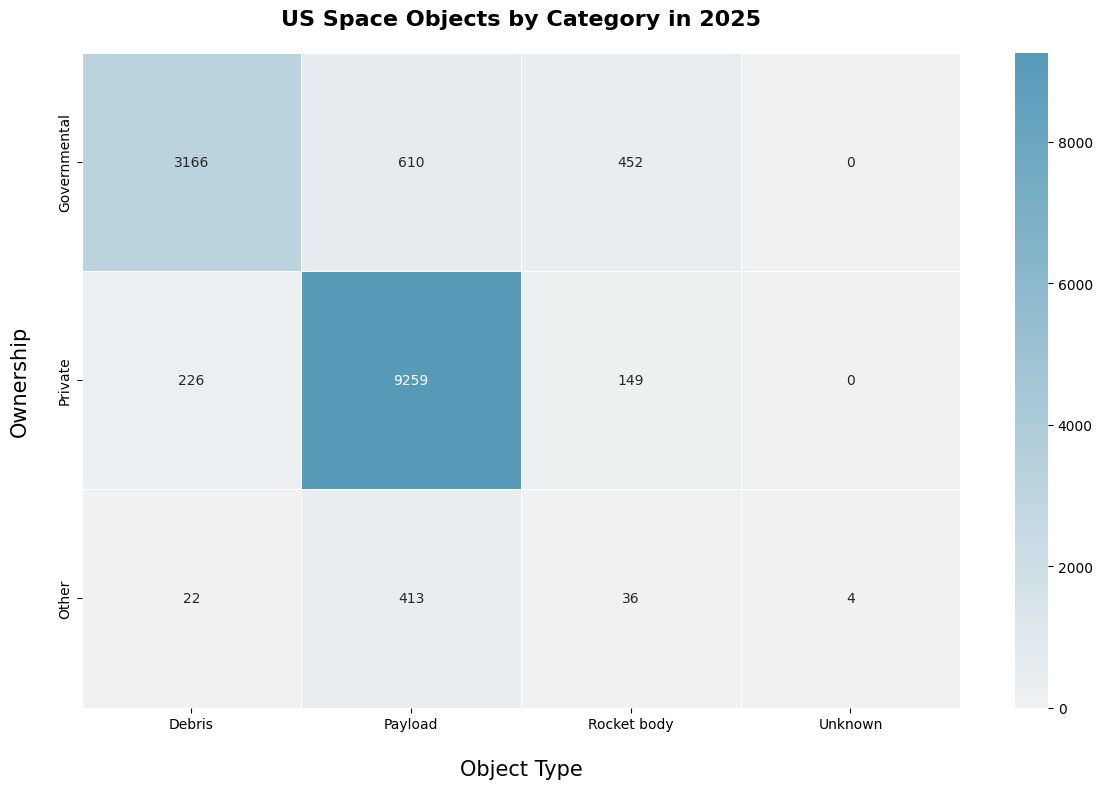

In [ ]:
plt.figure(figsize=(12, 8))
category_object_cross = pd.crosstab(us_objects['launch_category'], us_objects['object_type'])

# Reorder index so "Other" comes last
order = ['Governmental', 'Private', 'Other']  # <-- your preferred order
category_object_cross = category_object_cross.reindex(order)

# Create a blue palette based on your color
blue_palette = sns.light_palette("#569AB8", as_cmap=True)

sns.heatmap(
    category_object_cross,
    annot=True,
    fmt='d',
    cmap=blue_palette,
    linewidths=0.5,
    linecolor='white',
)

plt.title('US Space Objects by Category in 2025', fontsize=16, fontweight='bold', pad=20)

# Remove axis labels
plt.xlabel("Object Type", fontsize=15, labelpad=20)
plt.ylabel("Ownership", fontsize=15, labelpad=20)

plt.tight_layout()
plt.show()



<Figure size 2000x1000 with 0 Axes>

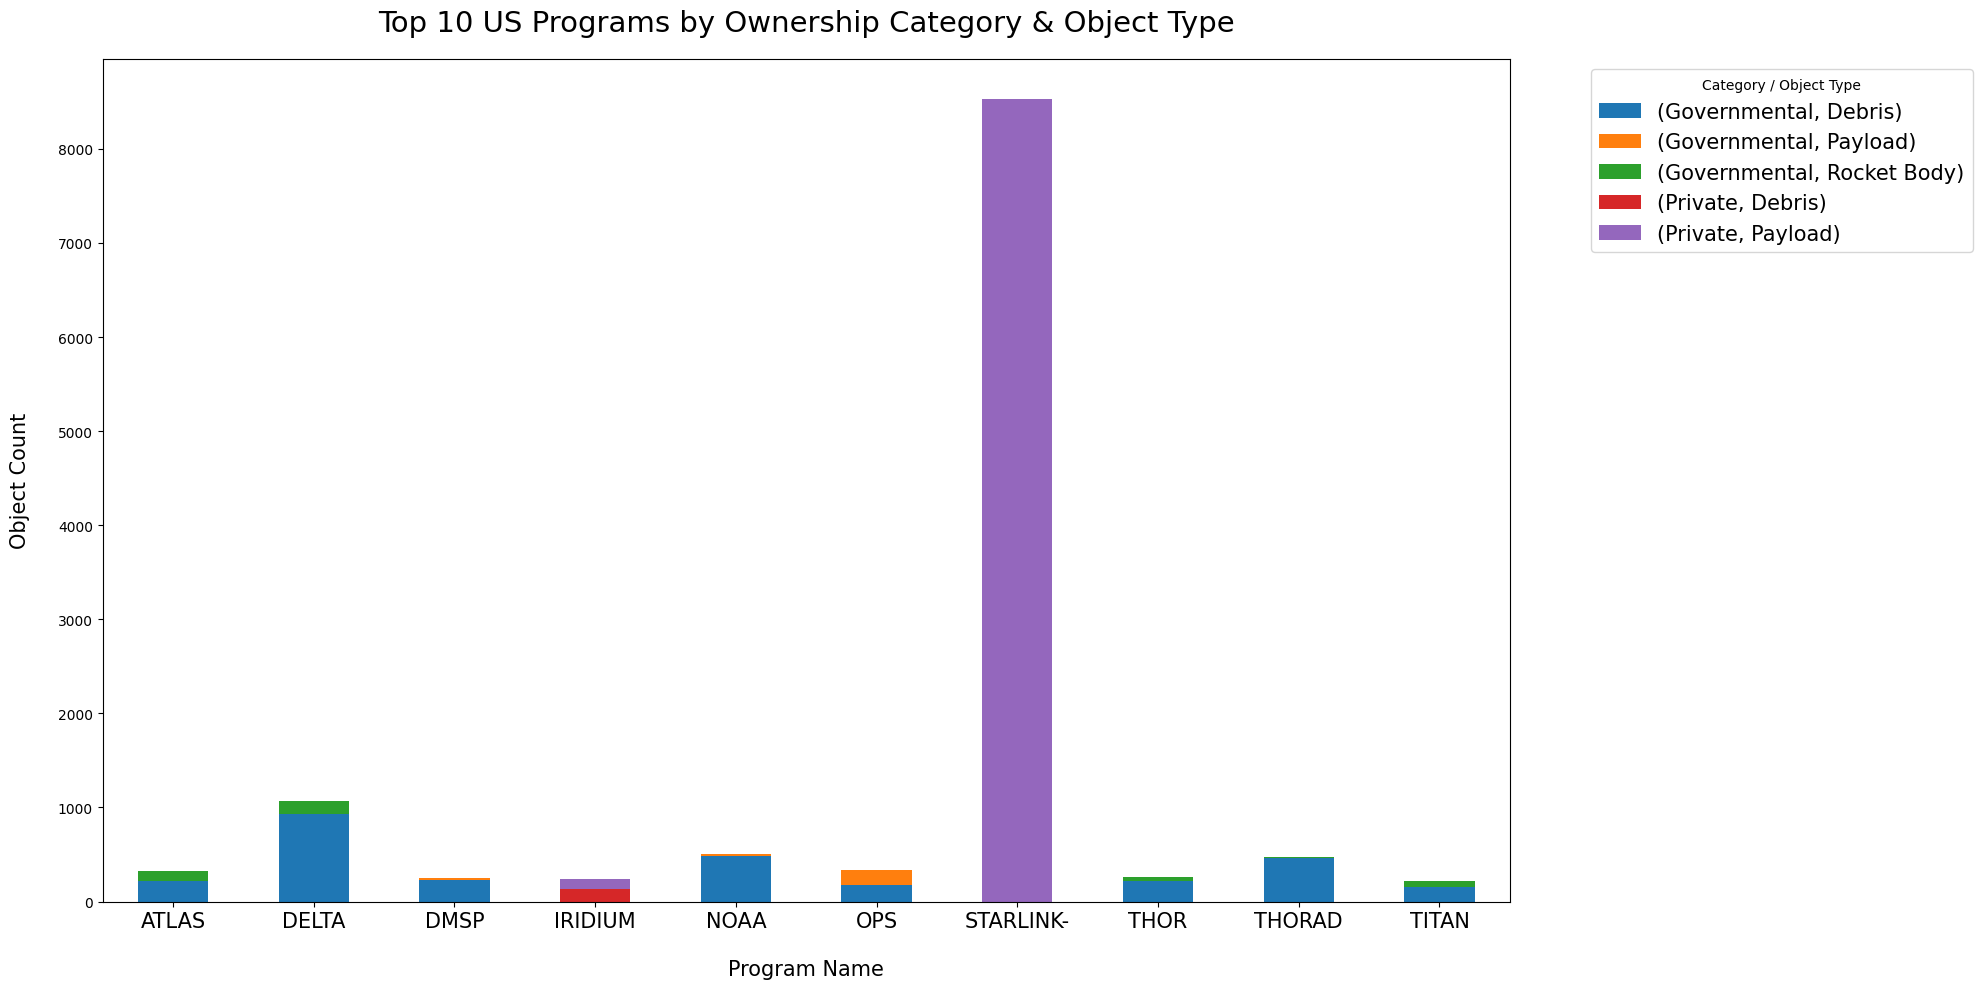

In [ ]:
# --- Enhanced: Top programs by category & object type ---
plt.figure(figsize=(20, 10))

# Top 10 programs
top_5_programs = top_programs.head(10).index
program_category_data = us_objects[us_objects['program'].isin(top_5_programs)].copy()

# Normalize object_type into groups
def normalize_object_type(obj_type):
    if pd.isna(obj_type):
        return "Unknown"
    t = str(obj_type).upper()
    if "PAYLOAD" in t:
        return "Payload"
    elif "DEBRIS" in t:
        return "Debris"
    elif "ROCKET" in t or "R/B" in t:
        return "Rocket Body"
    else:
        return "Other"

program_category_data["object_group"] = program_category_data["object_type"].apply(normalize_object_type)

# Build crosstab: Program × (Launch Category + Object Group)
program_category_cross = pd.crosstab(
    program_category_data['program'],
    [program_category_data['launch_category'], program_category_data['object_group']]
)

# Plot stacked bar
program_category_cross.plot(kind='bar', stacked=True, figsize=(20, 10))

plt.title('Top 10 US Programs by Ownership Category & Object Type',fontsize=21, pad = 20)
plt.xlabel('Program Name', fontsize=15, labelpad=20)
plt.ylabel('Object Count', fontsize=15, labelpad=20)
plt.xticks(rotation=0, fontsize=15)
plt.legend(title='Category / Object Type', bbox_to_anchor=(1.05, 1), fontsize=15, loc='upper left')
plt.tight_layout()
plt.savefig('us_top_programs_by_category_objecttype.png', dpi=300, bbox_inches='tight')
plt.show()
